In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns

In [2]:
shots=pd.read_csv('..\data\produced_datasets\season_17_18_shots.csv',index_col=[0])
shots['location']=[literal_eval(value) for value in shots['location']]
shots['shot.end_location']=[literal_eval(value) for value in shots['shot.end_location']]
luis=shots[(shots['player.id']==5246.0) & (shots['shot.type.id']==87.0)]

In [3]:
x=np.arange(40,121,8)
y=np.arange(0,81,8)
res_x = list(map(list, zip(x, x[1:])))
res_y = list(map(list, zip(y, y[1:])))
dic_y={res_y.index(element):element for element in res_y}
dic_x={res_x.index(element):element for element in res_x}
luis['zone_x']=[key for value in luis['location'] for key,result in dic_x.items() if (value[0]>=result[0]) & (value[0]<result[1])]
luis['zone_y']=[key for value in luis['location'] for key,result in dic_y.items() if (value[1]>=result[0]) & (value[1]<result[1])]
luis['zone'] = list(zip(luis.zone_x, luis.zone_y))

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [4]:
luis['to_goal']=[len(value)==3 for value in luis['shot.end_location']]
luis_made=luis[luis['to_goal']==True]
luis_made['on_goal_loc']=[[element[1],element[2]] if (element[1]>=36.0) & (element[1]<=44.0) & (element[2]<=2.67) & (element[2]>0) else 0 for element in luis_made['shot.end_location']]
luis_shots_on_goal=luis_made[luis_made['on_goal_loc']!=0]
luis_shots_on_goal['goal_x']=[element[0] for element in luis_shots_on_goal['on_goal_loc']]
luis_shots_on_goal['goal_y']=[element[1] for element in luis_shots_on_goal['on_goal_loc']]

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [5]:
x_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']=='Goal']['goal_x']
y_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']=='Goal']['goal_y']
x_no_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']!='Goal']['goal_x']
y_no_goal=luis_shots_on_goal[luis_shots_on_goal['shot.outcome.name']!='Goal']['goal_y']

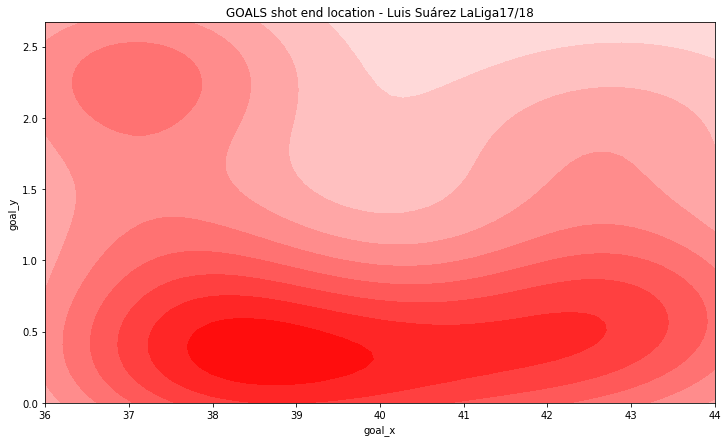

In [15]:
fig=plt.figure() #set up the figures
fig.set_size_inches(12, 7)
sns.kdeplot(x_goal, y_goal, shade=True, color='red')
plt.ylim(0, 2.67)
plt.xlim(36, 44)
plt.title('GOALS shot end location - Luis Suárez LaLiga17/18')
plt.show()

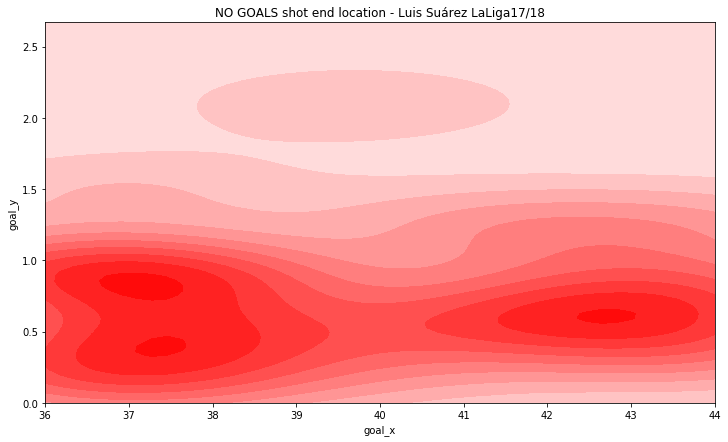

In [16]:
fig=plt.figure() #set up the figures
fig.set_size_inches(12, 7)
sns.kdeplot(x_no_goal, y_no_goal, shade=True, color='red')
plt.ylim(0, 2.67)
plt.xlim(36, 44)
plt.title('NO GOALS shot end location - Luis Suárez LaLiga17/18')
plt.show()

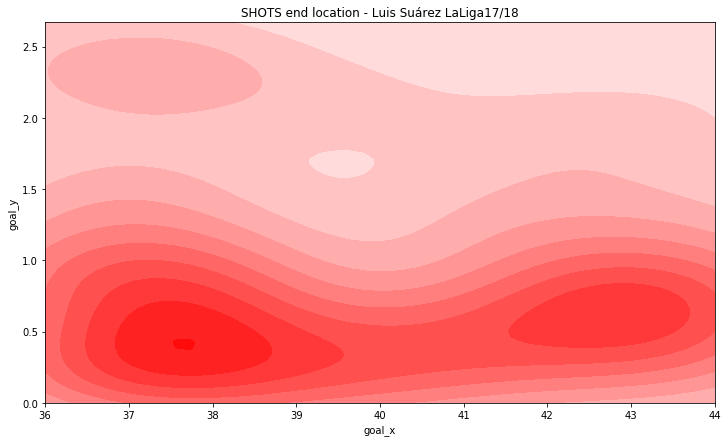

In [17]:
fig=plt.figure() #set up the figures
fig.set_size_inches(12, 7)
sns.kdeplot(luis_shots_on_goal['goal_x'], luis_shots_on_goal['goal_y'], shade=True, color='red')
plt.ylim(0, 2.67)
plt.xlim(36, 44)
plt.title('SHOTS end location - Luis Suárez LaLiga17/18')
plt.show()

In [18]:
luis_shots_on_goal['zone'].value_counts()

(8, 4)    11
(9, 4)     9
(8, 3)     8
(9, 5)     5
(9, 6)     4
(8, 6)     4
(9, 3)     1
(7, 6)     1
(8, 5)     1
(7, 3)     1
(7, 4)     1
Name: zone, dtype: int64

In [19]:
luis_shots_on_goal.groupby('zone')['goal_x','goal_y'].mean()

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,goal_x,goal_y
zone,,
"(7, 3)",41.200000,1.300000
"(7, 4)",37.200000,0.400000
"(7, 6)",42.100000,1.100000
"(8, 3)",38.425000,0.900000
"(8, 4)",39.545455,0.718182
"(8, 5)",41.500000,0.600000
"(8, 6)",41.525000,0.875000
"(9, 3)",36.900000,1.500000
"(9, 4)",38.455556,0.877778
